<a href="https://colab.research.google.com/github/rizqibm/EDA-Marketing_Analysis/blob/main/SurgePricing_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Surge Pricing Classification for Sigma Cabs Using Machine Learning**




# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [8]:
df = pd.read_csv("/content/sigma_cabs.csv")

# Exploration

In [9]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [12]:
df.isnull().sum()

,0
Trip_ID,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,5920
Life_Style_Index,20193
Confidence_Life_Style_Index,20193
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,71030


#Data Pre-processing

In [13]:
# Drop columns with excessive missing values
df.drop(columns=["Var1"], inplace=True)

In [14]:
df.dropna(subset=["Type_of_Cab", "Life_Style_Index", "Confidence_Life_Style_Index", "Customer_Since_Months"], inplace=True)


##Encode Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
for col in ["Type_of_Cab", "Life_Style_Index", "Confidence_Life_Style_Index", "Destination_Type", "Gender"]:
    df[col] = le.fit_transform(df[col])

#**EDA**

<ipython-input-17-ee36c9c10c4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Surge_Pricing_Type", palette="viridis")


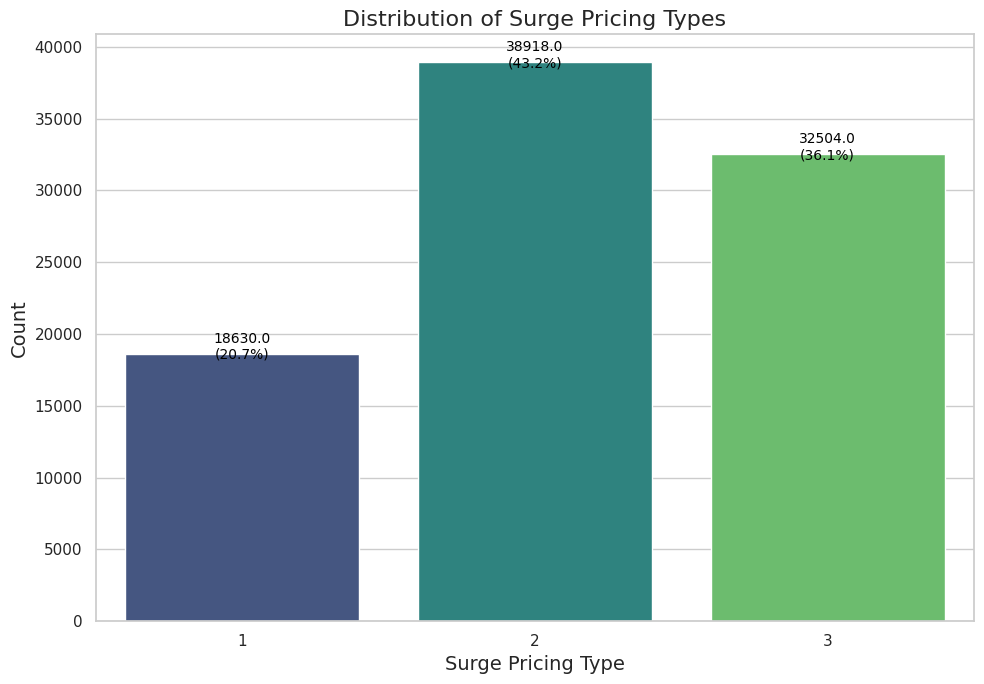

In [17]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the distribution of Surge Pricing Type
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x="Surge_Pricing_Type", palette="viridis")

# Adding title and labels
plt.title("Distribution of Surge Pricing Types", fontsize=16)
plt.xlabel("Surge Pricing Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with the count and percentage
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="center", fontsize=10, color="black", xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Menghitung distribusi surge pricing type
distribution = df['Surge_Pricing_Type'].value_counts()

# Membuat tabel dengan jumlah dan persentase
distribution_table = pd.DataFrame({
    'Surge_Pricing_Type': distribution.index,
    'Count': distribution.values,
    'Percentage': (distribution.values / len(df)) * 100
})

# Menampilkan tabel
print(distribution_table)

   Surge_Pricing_Type  Count  Percentage
0                   2  38918   43.217252
1                   3  32504   36.094701
2                   1  18630   20.688047


In [19]:
distribution_table

,Surge_Pricing_Type,Count,Percentage
0,2,38918,43.217252
1,3,32504,36.094701
2,1,18630,20.688047


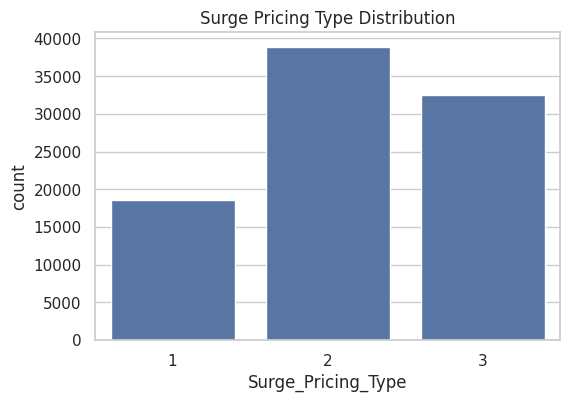

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Surge_Pricing_Type")
plt.title("Surge Pricing Type Distribution")
plt.show()

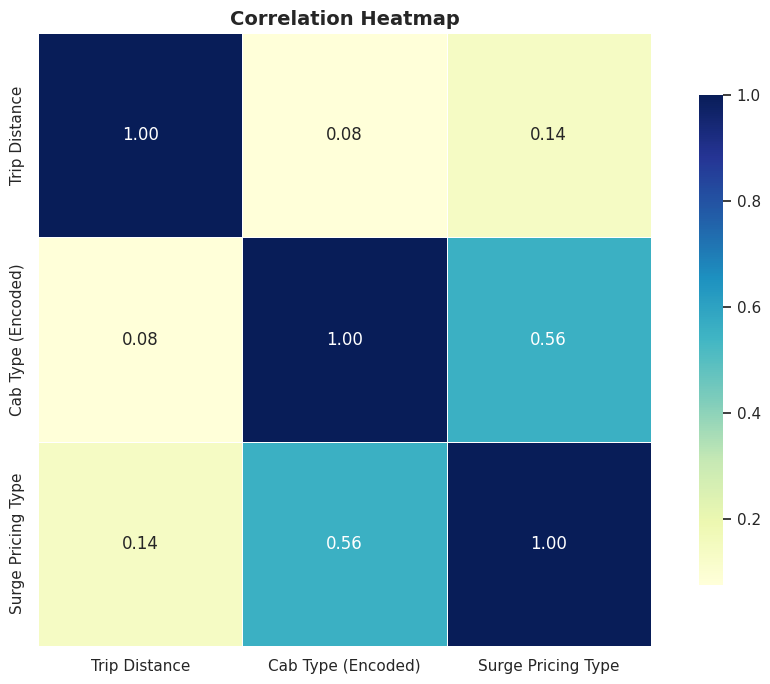

In [75]:
# Salin dataframe agar bisa rename untuk visual
corr_df = df[['Trip_Distance', 'Type_of_Cab', 'Surge_Pricing_Type']].copy()
corr_df.rename(columns={
    'Trip_Distance': 'Trip Distance',
    'Type_of_Cab': 'Cab Type (Encoded)',
    'Surge_Pricing_Type': 'Surge Pricing Type'
}, inplace=True)

# Korelasi
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True, linewidths=0.6, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

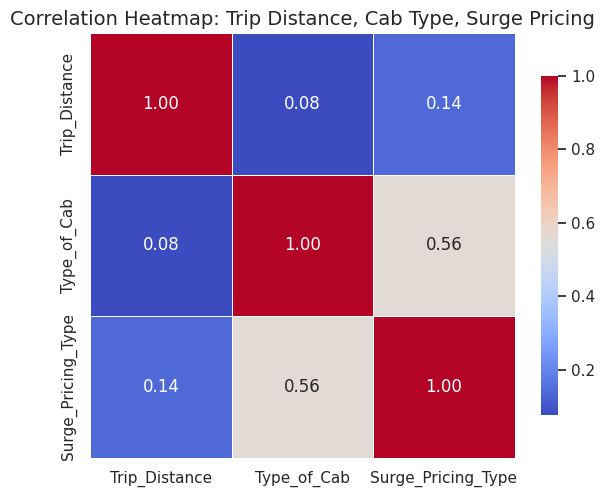

In [76]:
# Subset kolom numerik dan target untuk korelasi
corr_features = df[['Trip_Distance', 'Type_of_Cab', 'Surge_Pricing_Type']]
corr_matrix = corr_features.corr()

# Heatmap korelasi
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap: Trip Distance, Cab Type, Surge Pricing", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

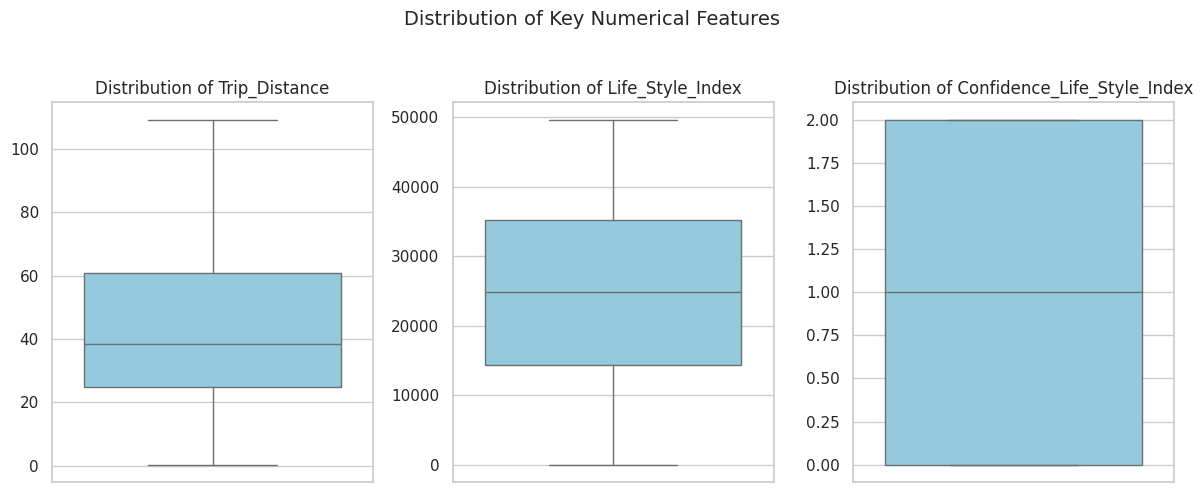

In [77]:
# Menyusun fitur-fitur kunci untuk distribusi
key_features = ['Trip_Distance', 'Life_Style_Index', 'Confidence_Life_Style_Index']

# Visualisasi dengan boxplot
plt.figure(figsize=(12, 5))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.ylabel('')
    plt.grid(True, axis='y')

plt.suptitle("Distribution of Key Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Feature and Target Selection

In [78]:
X = df.drop(columns=["Trip_ID", "Surge_Pricing_Type"])
y = df["Surge_Pricing_Type"]

#Model Building

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import train_test_split


###Split Data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Adjust y labels for XGBoost
y_train_adj = y_train - 1
y_test_adj = y_test - 1

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Pipeline

In [82]:
logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
logistic_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__solver": ["lbfgs", "liblinear"]
}

logistic_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
logistic_search.fit(X_train, y_train)
logistic_pred = logistic_search.predict(X_test)

print("\nBest Logistic Regression Params:", logistic_search.best_params_)
print("Classification Report:\n", classification_report(y_test, logistic_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))


Best Logistic Regression Params: {'clf__C': 10, 'clf__solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.58      0.65      3774
           2       0.64      0.75      0.69      7824
           3       0.69      0.65      0.67      6413

    accuracy                           0.68     18011
   macro avg       0.69      0.66      0.67     18011
weighted avg       0.68      0.68      0.67     18011

Confusion Matrix:
 [[2176 1287  311]
 [ 433 5851 1540]
 [ 290 1984 4139]]


#Random Forrest Grid

In [83]:
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_search = GridSearchCV(rf_model, rf_param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
rf_search.fit(X_train, y_train)
rf_pred = rf_search.predict(X_test)

print("\nBest Random Forest Params:", rf_search.best_params_)
print("Classification Report:\n", classification_report(y_test, rf_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.61      0.68      3774
           2       0.70      0.82      0.76      7824
           3       0.75      0.69      0.72      6413

    accuracy                           0.73     18011
   macro avg       0.74      0.71      0.72     18011
weighted avg       0.74      0.73      0.73     18011

Confusion Matrix:
 [[2318 1039  417]
 [ 340 6436 1048]
 [ 341 1657 4415]]


In [84]:
xgb_model = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)
xgb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.3],
    "max_depth": [3, 5, 7]
}

xgb_search = GridSearchCV(xgb_model, xgb_param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
xgb_search.fit(X_train, y_train_adj)
xgb_pred = xgb_search.predict(X_test)
xgb_pred_labels = xgb_pred + 1  # revert to original classes

print("\nBest XGBoost Params:", xgb_search.best_params_)
print("Classification Report:\n", classification_report(y_test, xgb_pred_labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred_labels))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.62      0.69      3774
           2       0.71      0.82      0.76      7824
           3       0.76      0.71      0.73      6413

    accuracy                           0.74     18011
   macro avg       0.75      0.72      0.73     18011
weighted avg       0.74      0.74      0.74     18011

Confusion Matrix:
 [[2333 1035  406]
 [ 340 6426 1058]
 [ 312 1576 4525]]


## Kesimpulan Model

Setelah dilakukan training dan hyperparameter tuning terhadap tiga model klasifikasi (Logistic Regression, Random Forest, dan XGBoost), hasil evaluasi menunjukkan bahwa model XGBoost memberikan performa terbaik secara keseluruhan.

Berikut ringkasan metrik dari ketiga model:

| Model               | Akurasi | F1-Score (Macro) | Recall Kelas 1 | Recall Kelas 2 | Recall Kelas 3 |
|---------------------|---------|------------------|----------------|----------------|----------------|
| Logistic Regression | 0.68    | 0.67             | 0.58           | 0.75           | 0.65           |
| Random Forest       | 0.73    | 0.72             | 0.61           | 0.82           | 0.69           |
| XGBoost             | **0.74**| **0.73**         | **0.62**       | **0.82**       | **0.71**       |

Dari hasil tersebut, bisa disimpulkan bahwa:
- **XGBoost** unggul dari sisi akurasi dan macro f1-score, serta menunjukkan performa yang seimbang di ketiga kelas.
- **Random Forest** juga cukup kompetitif, hanya sedikit di bawah XGBoost, dan bisa menjadi alternatif jika interpretabilitas lebih diutamakan.
- **Logistic Regression**, meskipun meningkat setelah tuning, masih kesulitan terutama di kelas 1.

### Catatan:
- Distribusi kelas yang tidak seimbang cukup mempengaruhi performa di kelas 1. Ke depannya bisa dipertimbangkan untuk menambahkan teknik seperti oversampling (contohnya SMOTE) agar model bisa belajar lebih baik terhadap kelas minoritas.
- Untuk memahami lebih dalam fitur apa saja yang paling berkontribusi dalam model, saya menambahkan visualisasi feature importance dari model XGBoost di bawah ini.

In [98]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import matplotlib.ticker as mtick

In [86]:
# Ambil model terbaik dari hasil GridSearchCV
best_xgb_model = xgb_search.best_estimator_

<Figure size 1200x800 with 0 Axes>

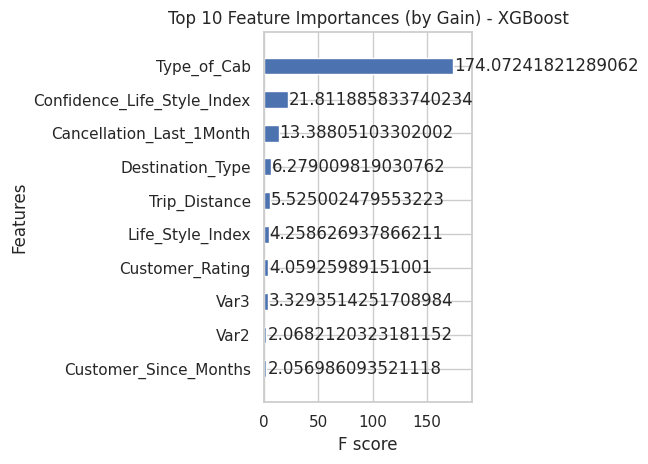

In [90]:
# Visualisasi 10 fitur terpenting berdasarkan 'gain'
plt.figure(figsize=(12, 8))
plot_importance(best_xgb_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (by Gain) - XGBoost")
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

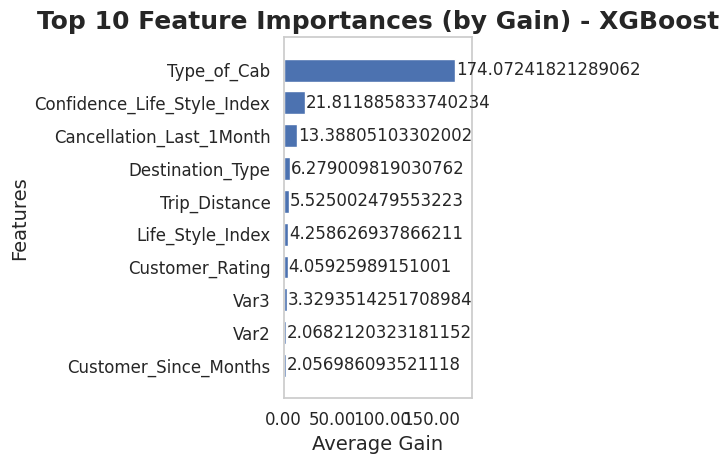

In [99]:
# Visualisasi 10 fitur terpenting berdasarkan 'gain'
plt.figure(figsize=(16, 10))
ax = plot_importance(
    best_xgb_model,
    importance_type='gain',
    max_num_features=10,
    height=0.7,
    grid=False,
    show_values=True
)

# Format angka pada sumbu X jadi 2 desimal
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.title("Top 10 Feature Importances (by Gain) - XGBoost", fontsize=18, fontweight='bold')
plt.xlabel("Average Gain", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

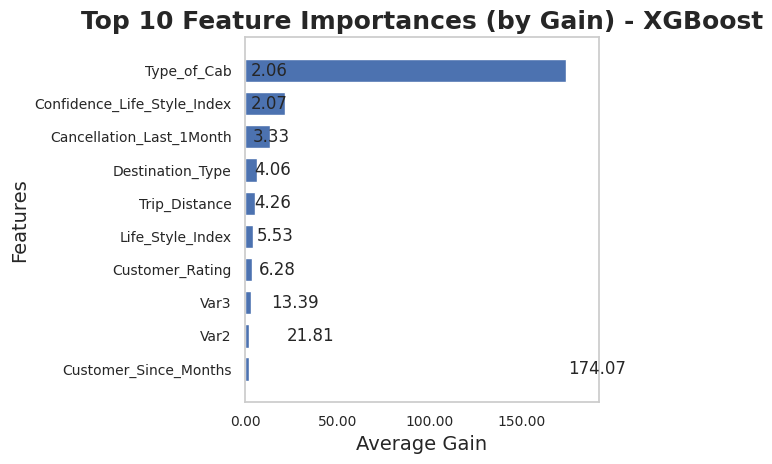

In [101]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import matplotlib.ticker as mtick

# Plot feature importance
plt.figure(figsize=(16, 10))
ax = plot_importance(
    best_xgb_model,
    importance_type='gain',
    max_num_features=10,
    height=0.7,
    grid=False,
    show_values=False  # kita matikan dulu value default
)

# Ambil nilai importance dan nama fitur
importance = best_xgb_model.get_booster().get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]

# Tambahkan nilai manual dengan pembulatan 2 desimal
for i, (_, val) in enumerate(sorted_importance):
    ax.text(val + 1, i, f"{val:.2f}", va='center', fontsize=12)

# Format axis dan judul
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.title("Top 10 Feature Importances (by Gain) - XGBoost", fontsize=18, fontweight='bold')
plt.xlabel("Average Gain", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Kesimpulan dan Observasi Fitur Penting XGBoost (berdasarkan Gain)

"""
1. Fitur Paling Dominan:
   - Type_of_Cab: F score sangat tinggi (174.07), menjadi fitur paling penting dalam model.
   
2. Fitur dengan Pengaruh Sedang:
   - Confidence_Life_Style_Index: F score 21.81
   - Cancellation_Last_1Month: F score 13.39
   
3. Fitur dengan Pengaruh Kecil:
   - Destination_Type: F score 6.28
   - Trip_Distance: F score 5.53
   - Life_Style_Index: F score 4.26
   - Customer_Rating: F score 4.06
   
4. Fitur Minim Pengaruh:
   - Var3: F score 3.33
   - Var2: F score 2.07
   - Customer_Since_Months: F score 2.06

Observasi Utama:
- Type_of_Cab mendominasi kontribusi prediksi model
- Terdapat 3 kelompok fitur: dominan, sedang, dan minor
- Beberapa fitur memiliki pengaruh sangat kecil (<5)
"""